<a href="https://colab.research.google.com/github/abhranil-datascience/RegressionPOC/blob/master/SVMRegressionPOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
############################## Mount Drive ######################################## 
from google.colab import drive
drive.mount('/content/gdrive')
############################## Change Directory ###################################
import os
os.chdir('/content/gdrive/My Drive/MLandDLFullCourse/ML/Regression/SupportVectorMachine')
########## Suppress Warnings ############
import warnings
warnings.filterwarnings('ignore')
########### Import Dataset #############
import pandas as pd
dataset=pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[:,1:2].values
Y=dataset.iloc[:,2].values

Mounted at /content/gdrive


In [0]:
########### Feature Scaling ############
from sklearn.preprocessing import StandardScaler
XScaler=StandardScaler()
YScaler=StandardScaler()
XScaled=XScaler.fit_transform(X.reshape(-1,1))
YScaled=YScaler.fit_transform(Y.reshape(-1,1))
########### Apply GridSearch to know hyperparameters #############
from sklearn.svm import SVR
RegressorSVR=SVR()
parametersSVR=[{'kernel':['linear','poly','rbf','sigmoid'],
               'degree':[2,3,4,5]}]
from sklearn.model_selection import GridSearchCV
GS=GridSearchCV(estimator=RegressorSVR,param_grid=parametersSVR,scoring='neg_mean_squared_error',cv=10)
GS.fit(X,Y)
best_params_svr=GS.best_params_#'degree': 5, 'kernel': 'poly'
best_params_svr

{'degree': 5, 'kernel': 'poly'}

Goodness of Fit: 0.9540437383321698


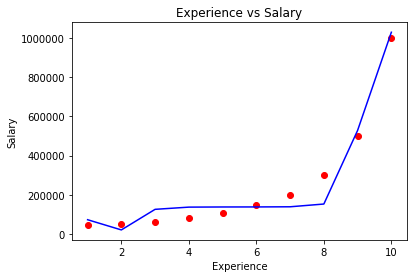

In [0]:
######## Create Regressor And Predict ###########
Reg=SVR(kernel='poly',degree=5)
from sklearn.preprocessing import PolynomialFeatures
PF=PolynomialFeatures(degree=5)
XPoly=PF.fit_transform(XScaled)
Reg.fit(XPoly,YScaled)
YPred=YScaler.inverse_transform(Reg.predict(XPoly))
import sklearn.metrics as mt
print("Goodness of Fit: "+str(mt.r2_score(Y,YPred)))#0.9540437383321698
####### Draw Graph ##########
import matplotlib.pyplot as plt
plt.scatter(X,Y,c='red')
plt.plot(X,YPred,c='blue')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.show()